# 타이타닉 생존자 예측하기

## 1. 데이터 읽고 윤곽 파악

In [86]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [7]:
raw_data = pd.read_excel("../data/titanic.xls")

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## 변수 설명
* boat - 탈출한 보트가 있다면 boat번호
* sibsp - 형제 동반
* parch - 부모 동반

### 1.1 데이터 확인

In [12]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
raw_data.describe()  # 숫자형 컬럼을 집계

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [16]:
raw_data.head(n = 5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1.2 시각화로 EDA

#### 생존률 확인

In [45]:
raw_data.groupby(['survived', 'pclass', 'age_cat'])['survived'].count().reset_index()

ValueError: cannot insert survived, already exists

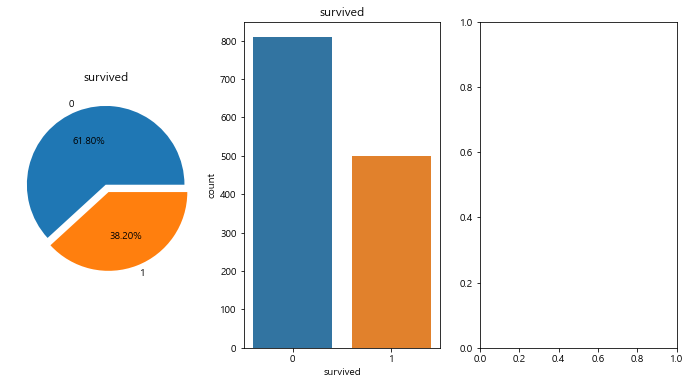

In [50]:
f, ax = plt.subplots(1, 3, figsize = (12, 6))
raw_data['survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.2f%%', ax = ax[0])
ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot('survived', data = raw_data, ax = ax[1])
ax[1].set_title('survived')
plt.show()

#### 연령대로 분포

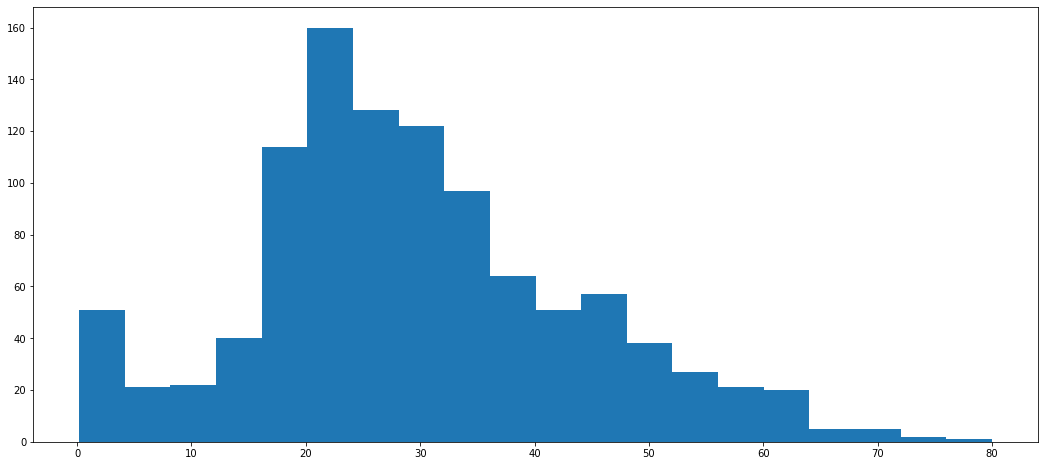

In [26]:
raw_data['age'].hist(bins = 20, figsize = (18, 8), grid = False)

In [27]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [28]:
1등칸 - 생존률이 가장 많고, 3등칸은 생존률이 가장 적다.
3등칸 - 생존률이 가장 작다. 자녀동반율도 가장 많네. ㅠㅠ

SyntaxError: invalid syntax (<ipython-input-28-8130d5a2f2ae>, line 1)

In [29]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


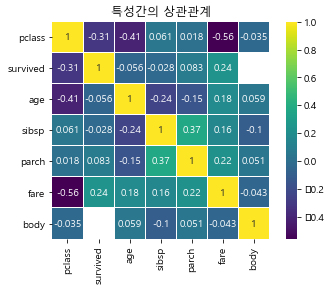

In [34]:
sns.heatmap(raw_data.corr(), linewidth = 0.01, square = True , annot = True, cmap = plt.cm.viridis, linecolor= 'white')
plt.title('특성간의 상관관계')
plt.show()

## 2. 나이별 및 성별 생존률 확인

In [35]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise', ordered: bool = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
    

In [32]:
raw_data['age_cat'] = pd.cut(raw_data['age'],bins = [0, 3, 7, 15, 30, 60, 100],
                            include_lowest = True,  # 앞 구간을 포함시키겠다는 의미.
                            labels = ['baby', 'children', 'teenage', 'young', 'adult', 'old'])
raw_data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old


In [52]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


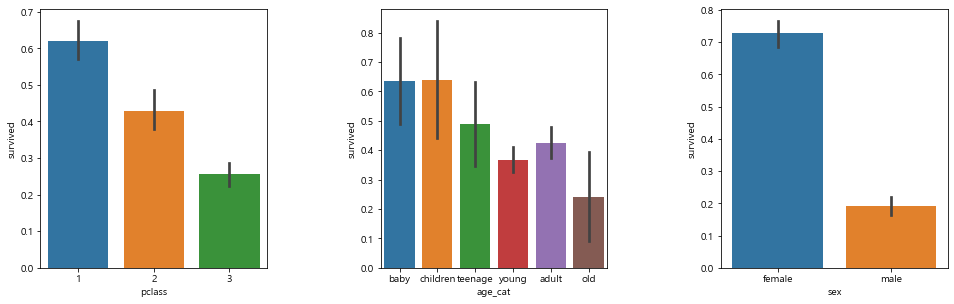

In [48]:
plt.figure(figsize = [14, 4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data = raw_data)

plt.subplot(132)
sns.barplot('age_cat', 'survived', data = raw_data)


plt.subplot(133)
sns.barplot('sex', 'survived', data = raw_data)
plt.subplots_adjust(top  = 1, bottom = 0.1, left = 0.10, right = 1, hspace = 0.5, wspace = 0.5)
plt.show()

## 성별

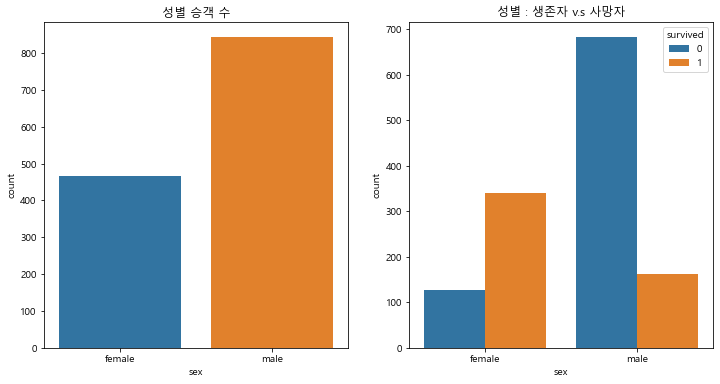

In [51]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.countplot('sex', data = raw_data, ax = ax[0])
ax[0].set_title('성별 승객 수')

sns.countplot('sex', hue = 'survived' , data = raw_data, ax = ax[1])
ax[1].set_title('성별 : 생존자 v.s 사망자')
plt.show()

## 보트 탑승객의 생존률

In [55]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


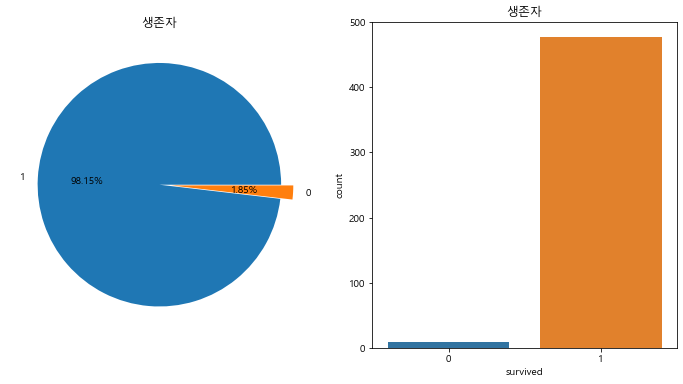

In [61]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
boat_survivors['survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.2f%%', ax = ax[0])
ax[0].set_title('생존자')
ax[0].set_ylabel('')

sns.countplot('survived', data = boat_survivors, ax = ax[1])
ax[1].set_title('생존자')
plt.show()

### 인사이트
* 보트 탑승객, 여성, 아이는 생존률이 높다는 데이터의 인사이트를 얻었다.

## 귀족들의 생존률만 다시 조사해보기

In [62]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [65]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [66]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [67]:
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [69]:
test = lambda x: x + 2
test(2)

4

In [71]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [73]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [75]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

In [74]:
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [93]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major', 'Sir', 'Rev', 'Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each,'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [96]:
# Noblese Oblidge
print(raw_data[['title', 'survived']].groupby('title', as_index = False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


## 학습하기 위한 사전 정리 작업
* 데이터 정리 및 특징 선택

In [97]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [99]:
tmp = []
for each in raw_data['sex']:
    if each == 'male':
        tmp.append(0)
    elif each == "female":
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [100]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [101]:
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


### 널인것을 정리

In [131]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data = raw_data[raw_data['pclass'].notnull()]
raw_data = raw_data[raw_data['sex'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


## 생존자 예측을 위한 모델 수립
* 의사결정을 가진 예측

In [132]:
train_pre = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,0.0,0.9167,1.0,2.0,151.5500
2,1.0,1.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,1.0,25.0000,1.0,2.0,151.5500


In [115]:
type(raw_data[['survived']])

pandas.core.frame.DataFrame

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_pre,
                                                   raw_data[['survived']],
                                                   test_size = 0.1,
                                                   random_state = 13)

In [134]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [137]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [138]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [139]:
X_train = X_train.reset_index()
X_train = X_train.drop(columns = 'index', axis = 1)

X_test = X_test.reset_index()
X_test = X_test.drop(columns = 'index', axis = 1)

y_train = y_train.reset_index()
y_train = y_train.drop(columns = 'index', axis = 1)

y_test = y_test.reset_index()
y_test = y_test.drop(columns = 'index', axis = 1)

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 44.2 KB


In [141]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 13)
tree_clf.fit(X_train, y_train)

print('Scre : {}'.format(tree_clf.score(X_train, y_train)))

Scre : 0.8117021276595745


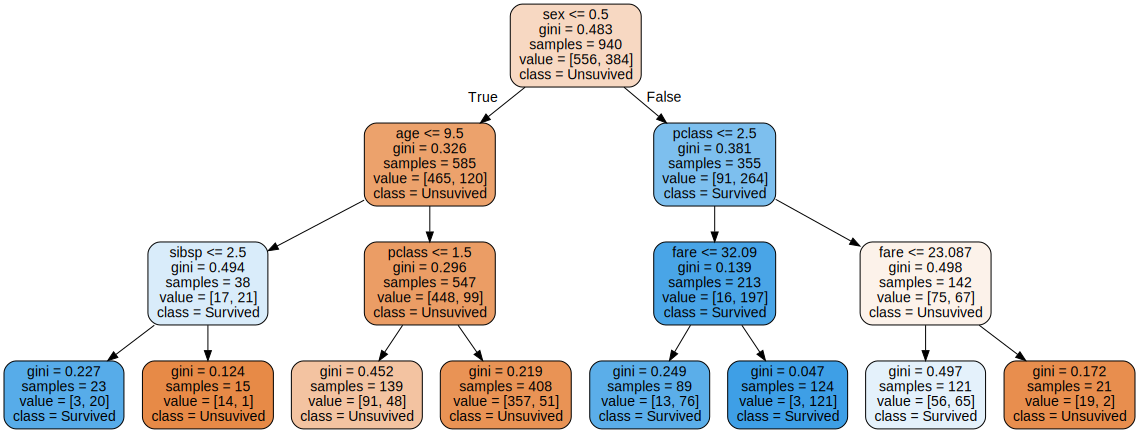

In [145]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_clf, 
                out_file = "titanic.dot", 
               feature_names = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
               class_names = ['Unsuvived', 'Survived'],
               rounded = True,
               filled = True)

with open(("titanic.dot"), "r", encoding = 'utf8') as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'titanic_tree' ,directory = 'img/decisin_trees', cleanup = True)
dot

In [184]:
from sklearn.metrics import accuracy_score

y_pred  =tree_clf.predict(X_test)
print("의사결정 트리 정확도 : {}".format(accuracy_score(y_test, y_pred) * 100))

의사결정 트리 정확도 : 84.76190476190476


## 디카프리오 생존 예측

In [165]:
# ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
dicaprio = [3.,1., 19.,0., 0., 5.]
winslet = [1., 0., 17.,1., 1., 100.]
me = [3., 1., 51.,3., 2., 5.]

In [150]:
# 예측확률
tree_clf.predict_proba([winslet])

array([[0.65467626, 0.34532374]])

In [151]:
# 예측확률
tree_clf.predict_proba([dicaprio])

array([[0.46280992, 0.53719008]])

In [158]:
# 나의 살 확률은?
tree_clf.predict_proba([me])

array([[0.14606742, 0.85393258]])

In [171]:
def isSurvived(name, person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, 'is ', isSurvive, '--> ', max(tree_clf.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
tree_clf.predict([me])

Dicaprio is  survived -->  0.5371900826446281


array([1.])

## RandomForestClassifier를 통한 생존자 예측

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# max_depth의 기본값 3
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_clf.fit(X_train, y_train)

print("훈련 세트 정확도 : {0:.3f}".format(rf_clf.score(X_train, y_train)))
print("테스트 세트 정확도 : {0:.3f}".format(rf_clf.score(X_test, y_test)))

rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.790
RandomForestClassifier 정확도 : 0.7905


In [194]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth =2)
rf_clf.fit(X_train, y_train)

print("훈련 세트 정확도 : {0:.3f}".format(rf_clf.score(X_train, y_train)))
print("테스트 세트 정확도 : {0:.3f}".format(rf_clf.score(X_test, y_test)))

rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

훈련 세트 정확도 : 0.773
테스트 세트 정확도 : 0.819
RandomForestClassifier 정확도 : 0.8190


#### 랜덤포레스의 경우 max_depth가 기본값인 3인 경우는 약간의 과적합이 보이나, 1,2로 했을때 훈련세트의 정확도는 떨어지는 테스트세트 
정확도와 예측의 정확도는 오히려 증가함.

### GradientBoostingClassifier
* 기본값 : n_estimators = 100 , learning_rate = 0.1, max_depth = 3

In [185]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbrt = GradientBoostingClassifier(random_state = 0) 
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {0:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {0:.3f}".format(gbrt.score(X_test, y_test)))

gb_pred = gbrt.predict(X_test)
print('GradientBoostingClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, gb_pred)))

훈련 세트 정확도 : 0.874
테스트 세트 정확도 : 0.819
GradientBoostingClassifier 정확도 : 0.8190


### 성능 튜닝
* learning_rate비율 조정을 통한 최적 성능 찾기

In [192]:
learning_rate = [0.01, 0.05, 0.09]

for idx, l_rate in enumerate(learning_rate):
    gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = l_rate) 
    gbrt.fit(X_train, y_train)
    gb_pred = gbrt.predict(X_test)
    
    print('{0} 번째 학습비율 : {1} -> GradientBoostingClassifier 정확도 : {2:.4f}'.format(idx, l_rate,accuracy_score(y_test, gb_pred)))

0 번째 학습비율 : 0.01 -> GradientBoostingClassifier 정확도 : 0.8571
1 번째 학습비율 : 0.05 -> GradientBoostingClassifier 정확도 : 0.8667
2 번째 학습비율 : 0.09 -> GradientBoostingClassifier 정확도 : 0.8190


#### **learning_rate**가 0.05일때 정확도가 제일 좋다.